# このSprintについて

## Sprintの目的
- 発展的なRNNの手法を理解する
- ドキュメントを網羅的に読む

## どのように学ぶか
Kerasに用意されているRNN関係のレイヤーを動作させながら学んでいきます。

# KerasのRecurrentレイヤー
Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれらすべてを動かした上で、それぞれの役割を説明できる状態を目指します。

以下のドキュメントにまとめられています。

https://keras.io/ja/layers/recurrent/

## 【問題１】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行ってください。

Keras公式のサンプルコードを利用してください。

**LSTMのサンプルコード**

https://github.com/awslabs/keras-apache-mxnet/blob/master/examples/imdb_lstm.py

**ConvLSTM2Dのサンプルコード**

https://github.com/awslabs/keras-apache-mxnet/blob/master/examples/conv_lstm.py

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。すべて実行する上での実行時間を考慮した数に設定してください。

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

### LSTM

In [ ]:
max_features = 20000
#cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


25000 train sequences
25000 test sequences


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [ ]:
print('Build model...')
model = Sequential()

Build model...


In [ ]:
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [ ]:
print('Train...')
model.fit(x_train, y_train, 
          batch_size = batch_size, 
          epochs=15, 
          validation_data=(x_test, y_test))

Train...
Epoch 1/15
782/782 [==============================] - 191s 241ms/step - loss: 0.5318 - accuracy: 0.7147 - val_loss: 0.3683 - val_accuracy: 0.8350
Epoch 2/15
782/782 [==============================] - 188s 240ms/step - loss: 0.2505 - accuracy: 0.9017 - val_loss: 0.3736 - val_accuracy: 0.8378
Epoch 3/15
782/782 [==============================] - 187s 239ms/step - loss: 0.1527 - accuracy: 0.9439 - val_loss: 0.4983 - val_accuracy: 0.8258
Epoch 4/15
782/782 [==============================] - 187s 239ms/step - loss: 0.0969 - accuracy: 0.9660 - val_loss: 0.5766 - val_accuracy: 0.8265
Epoch 5/15
782/782 [==============================] - 187s 239ms/step - loss: 0.0648 - accuracy: 0.9781 - val_loss: 0.6062 - val_accuracy: 0.8031
Epoch 6/15
782/782 [==============================] - 187s 239ms/step - loss: 0.0511 - accuracy: 0.9838 - val_loss: 0.7422 - val_accuracy: 0.8177
Epoch 7/15
782/782 [==============================] - 187s 239ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss:

In [ ]:
score, acc = model.evaluate(x_test, y_test, 
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 20s 26ms/step - loss: 1.0118 - accuracy: 0.8079
Test score: 1.01177978515625
Test accuracy: 0.807919979095459


### SimpleRNN

In [ ]:
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import ConvLSTM2D

In [ ]:
max_features = 20000
#cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

In [ ]:
"""
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
"""

"\nprint('Loading data...')\n(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)\nprint(len(x_train), 'train sequences')\nprint(len(x_test), 'test sequences')\n\nprint('Pad sequences (samples x time)')\nx_train = sequence.pad_sequences(x_train, maxlen=maxlen)\nx_test = sequence.pad_sequences(x_test, maxlen=maxlen)\nprint('x_train shape:', x_train.shape)\nprint('x_test shape:', x_test.shape)\n"

In [ ]:
print('Build model...')
model = Sequential()

Build model...


In [ ]:
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
print('Train...')
model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=15, 
          validation_data=(x_test, y_test))

Train...
Epoch 1/15
782/782 [==============================] - 53s 66ms/step - loss: 0.7027 - accuracy: 0.5226 - val_loss: 0.6279 - val_accuracy: 0.6281
Epoch 2/15
782/782 [==============================] - 52s 66ms/step - loss: 0.5604 - accuracy: 0.7037 - val_loss: 0.4745 - val_accuracy: 0.7884
Epoch 3/15
782/782 [==============================] - 52s 67ms/step - loss: 0.4336 - accuracy: 0.8043 - val_loss: 0.5379 - val_accuracy: 0.7750
Epoch 4/15
782/782 [==============================] - 52s 66ms/step - loss: 0.4006 - accuracy: 0.8232 - val_loss: 0.5491 - val_accuracy: 0.7440
Epoch 5/15
782/782 [==============================] - 52s 66ms/step - loss: 0.4015 - accuracy: 0.8258 - val_loss: 0.4615 - val_accuracy: 0.7985
Epoch 6/15
782/782 [==============================] - 52s 66ms/step - loss: 0.3446 - accuracy: 0.8588 - val_loss: 0.8820 - val_accuracy: 0.7176
Epoch 7/15
782/782 [==============================] - 53s 67ms/step - loss: 0.5462 - accuracy: 0.7170 - val_loss: 0.6007 - val_

In [ ]:
score, acc = model.evaluate(x_test, y_test, 
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 7s 9ms/step - loss: 0.5772 - accuracy: 0.7642
Test score: 0.5772133469581604
Test accuracy: 0.76419997215271


### GRU

In [ ]:
max_features = 20000
#cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

In [ ]:
"""
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
"""

"\nprint('Loading data...')\n(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)\nprint(len(x_train), 'train sequences')\nprint(len(x_test), 'test sequences')\n\nprint('Pad sequences (samples x time)')\nx_train = sequence.pad_sequences(x_train, maxlen=maxlen)\nx_test = sequence.pad_sequences(x_test, maxlen=maxlen)\nprint('x_train shape:', x_train.shape)\nprint('x_test shape:', x_test.shape)\n"

In [ ]:
print('Build model...')
model = Sequential()

Build model...


In [ ]:
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
print('Train...')
model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=15, 
          validation_data=(x_test, y_test))

Train...
Epoch 1/15
782/782 [==============================] - 169s 213ms/step - loss: 0.5164 - accuracy: 0.7191 - val_loss: 0.3483 - val_accuracy: 0.8461
Epoch 2/15
782/782 [==============================] - 168s 215ms/step - loss: 0.2392 - accuracy: 0.9051 - val_loss: 0.3489 - val_accuracy: 0.8494
Epoch 3/15
782/782 [==============================] - 169s 216ms/step - loss: 0.1298 - accuracy: 0.9553 - val_loss: 0.4480 - val_accuracy: 0.8320
Epoch 4/15
782/782 [==============================] - 168s 215ms/step - loss: 0.0684 - accuracy: 0.9786 - val_loss: 0.5796 - val_accuracy: 0.8281
Epoch 5/15
782/782 [==============================] - 169s 216ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.6676 - val_accuracy: 0.8240
Epoch 6/15
782/782 [==============================] - 177s 227ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.7782 - val_accuracy: 0.8223
Epoch 7/15
782/782 [==============================] - 176s 225ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss:

In [ ]:
score, acc = model.evaluate(x_test, y_test, 
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 17s 21ms/step - loss: 1.1837 - accuracy: 0.8128
Test score: 1.1837477684020996
Test accuracy: 0.8127999901771545


3つのモデルを同じepoch数で学習し、精度を比較した。いずれも過学習しているのでearly stoppingは行った方が良い。15epoch後の精度で見れば、LSTM,GRUはSimpleRNNよりも1割ほど精度が高い。


### ConvLSTM2D

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

In [ ]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

Epoch 1/3
95/95 [==============================] - 1412s 15s/step - loss: 0.8727 - val_loss: 0.7201
Epoch 2/3
95/95 [==============================] - 1440s 15s/step - loss: 0.8006 - val_loss: 0.7799
Epoch 3/3
95/95 [==============================] - 1442s 15s/step - loss: 0.7475 - val_loss: 0.8738


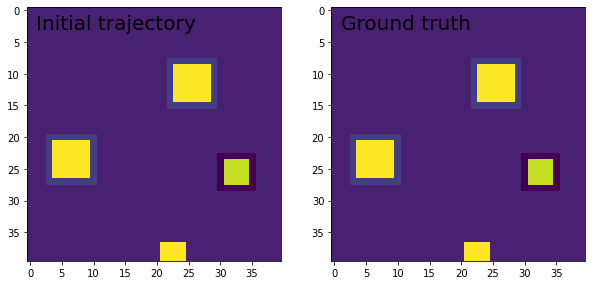

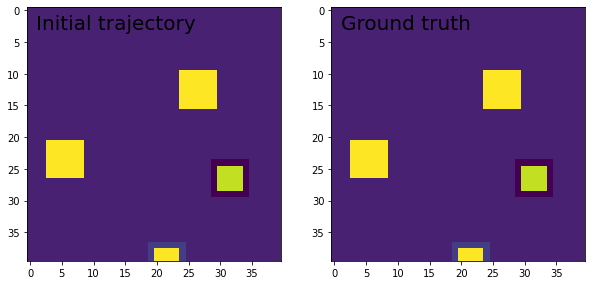

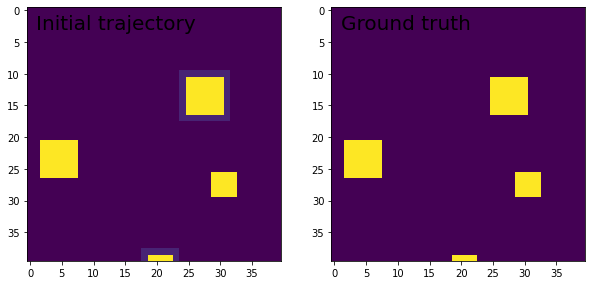

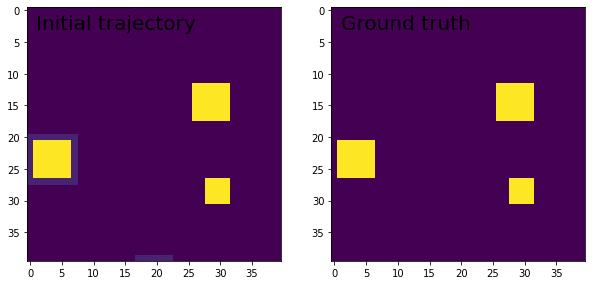

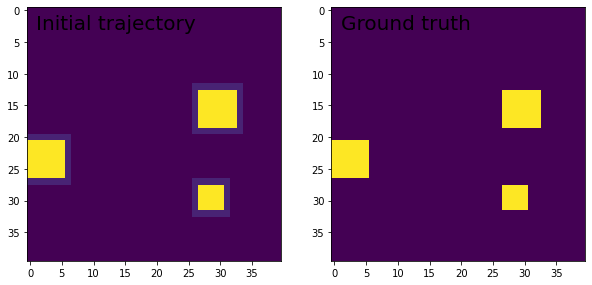

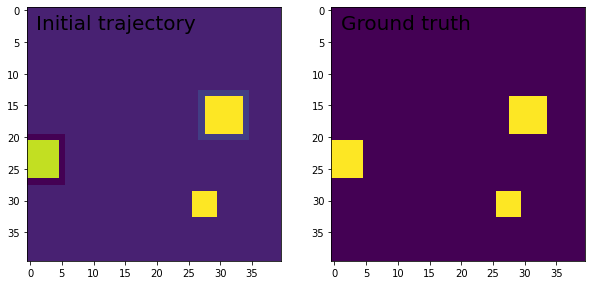

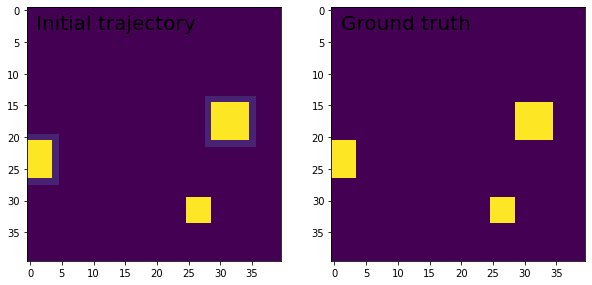

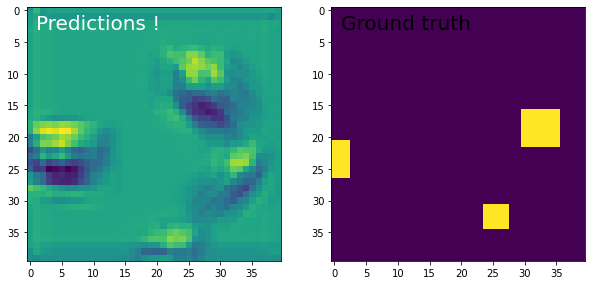

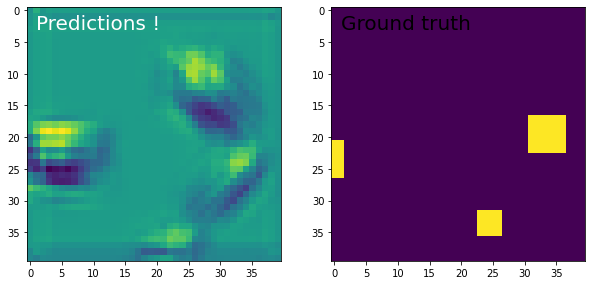

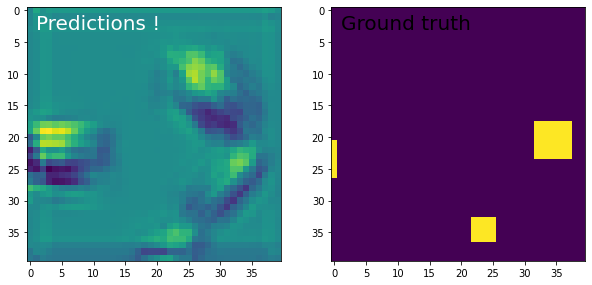

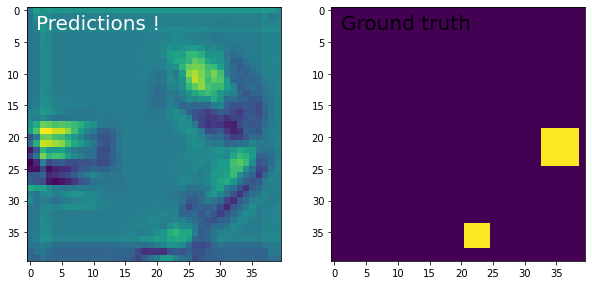

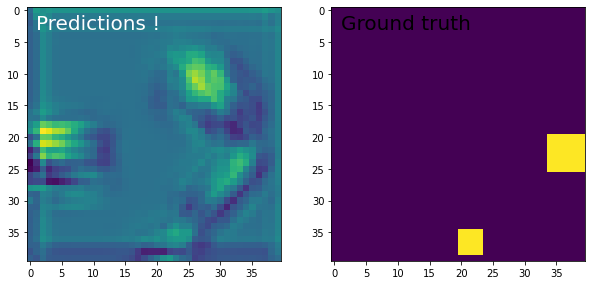

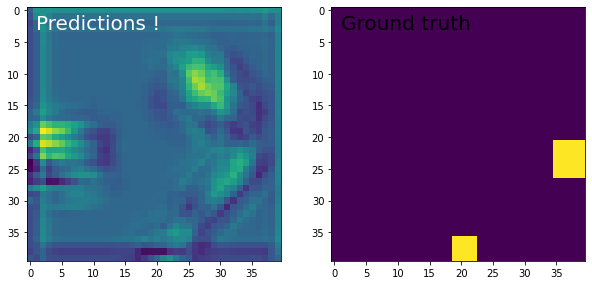

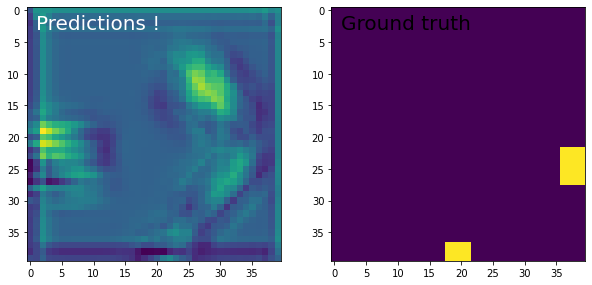

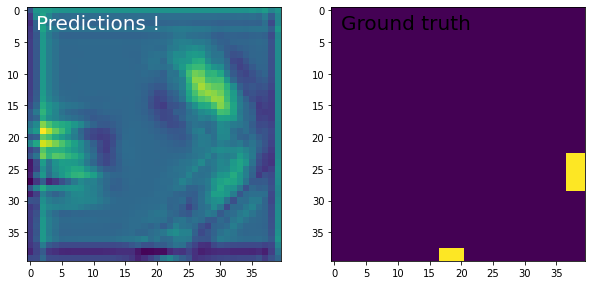

In [ ]:
if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

'''
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())
'''

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.


# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1)) 

## 【問題２】(アドバンス課題)複数のデータセット間での比較
他のデータセットでも実験を行ってください。

https://keras.io/ja/datasets/#_5

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤートピックス分類があります。

## 【問題３】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

- RNN ・・・Recurrentレイヤーに対する基底クラス
- SimpleRNNCell ・・・SimpleRNNのCellクラス．
- GRUCell ・・・GRUレイヤーのためのCellクラス．
- LSTMCell ・・・LSTMレイヤーのためのcellクラス．
- StackedRNNCells ・・・RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．効率的なstacked RNNを実装するために使われる．
- CuDNNGRU ・・・CuDNNを利用した高速なGRU実装．TensorFlowバックエンドでGPU上でのみ動作．
- CuDNNLSTM ・・・CuDNNを利用した高速なLSTM実装．TensorFlowバックエンドでGPU上でのみ動作．